<a href="https://colab.research.google.com/github/Zwarrior-22/Medical-Machine-Learning-Portfolio/blob/main/Diabetes/Project_2(DIAB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded1 = files.upload()


import pandas as pd

# --- 1. Load the Dataset ---
# Assuming 'diabetes.csv' is correctly located.
try:
    df_diabetes = pd.read_csv('diabetes.csv')
    print("Diabetes dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found. Please check the file path.")
    exit()

# --- 2. Check for Implicit Missing Data (Zeros) ---

# These columns cannot logically contain a value of 0 in a real, living patient:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n--- Count of IMPOSSIBLE ZERO Values (Hidden Missing Data) ---")
for col in zero_cols:
    zero_count = (df_diabetes[col] == 0).sum()

    if zero_count > 0:
        print(f"'{col}': {zero_count} zero entries found.")
    else:
        print(f"'{col}': No zero entries found.")

# --- 3. Check Target Variable Balance ---
print("\n--- Target Variable Class Balance (Outcome) ---")
target_counts = df_diabetes['Outcome'].value_counts()
print(target_counts)
print(f"Ratio of No Diabetes (0) to Diabetes (1): {target_counts[0] / target_counts[1]:.2f}")

Saving diabetes.csv to diabetes.csv
Diabetes dataset loaded successfully.

--- Count of IMPOSSIBLE ZERO Values (Hidden Missing Data) ---
'Glucose': 5 zero entries found.
'BloodPressure': 35 zero entries found.
'SkinThickness': 227 zero entries found.
'Insulin': 374 zero entries found.
'BMI': 11 zero entries found.

--- Target Variable Class Balance (Outcome) ---
Outcome
0    500
1    268
Name: count, dtype: int64
Ratio of No Diabetes (0) to Diabetes (1): 1.87


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset (assuming it's already in your environment)
df_diabetes = pd.read_csv('diabetes.csv')

# Define features and target
target_col = 'Outcome'
# Separating the features (X) from what we want to predict (y)
X = df_diabetes.drop(columns=[target_col])
y = df_diabetes[target_col]

# Columns where 0 represents missing data (IMPOSSIBLE ZEROS)
zero_impute_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Other numerical columns that are clean and don't need imputation
# clean_numerical_cols = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age'] # (Not strictly needed here, but good for context)


# --- 2.1 Create Preprocessing Pipeline ---

# We need to turn those impossible zeros into NaNs so the imputer can work
X[zero_impute_cols] = X[zero_impute_cols].replace(0, np.nan)

# Building a combined pipeline for Imputation and Scaling
numerical_pipeline = Pipeline(steps=[
    # First, fill in the missing data (NaNs) using the median, which is robust to outliers
    ('imputer', SimpleImputer(strategy='median')),
    # Next, scale all features so no single value (like Age) dominates the model's math
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to apply the same pipeline to ALL our features
preprocessor = ColumnTransformer(
    transformers=[
        # Apply the combined imputation and scaling to every column in the dataset
        ('num_processing', numerical_pipeline, X.columns.tolist())
    ],
    remainder='passthrough' # Making sure we don't accidentally drop anything
)

# --- 2.2 Apply Preprocessing and Convert back to DataFrame ---
print("\n--- Applying Imputation and Scaling ---")

# Run the full cleaning and transformation process on the features
X_processed = preprocessor.fit_transform(X)

# Convert the resulting NumPy array back into a readable Pandas DataFrame
X_df = pd.DataFrame(X_processed, columns=X.columns)

print("Processed Feature Matrix Head (We can see the scaled, centered values now):")
print(X_df.head())

# --- 2.3 Split the Data ---
# Splitting the clean data 80/20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y,
    test_size=0.2,
    random_state=42,
    # Crucial for this imbalanced dataset: ensures both sets have the same ratio of outcomes
    stratify=y
)

print("\n--- Final Data Split Status ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")



--- Applying Imputation and Scaling ---
Processed Feature Matrix Head (We can see the scaled, centered values now):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  

--- Final Data Split Status ---
X_train shape: (614, 8)
X_test shape: (154, 8)


/tmp/ipython-input-2661270589.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diabetes[col].fillna(df_diabetes[col].median(), inplace=True)


--- Starting Project 2 Data Visualization ---

1. Visualizing Feature Distributions (Are they normal? Are they skewed?):


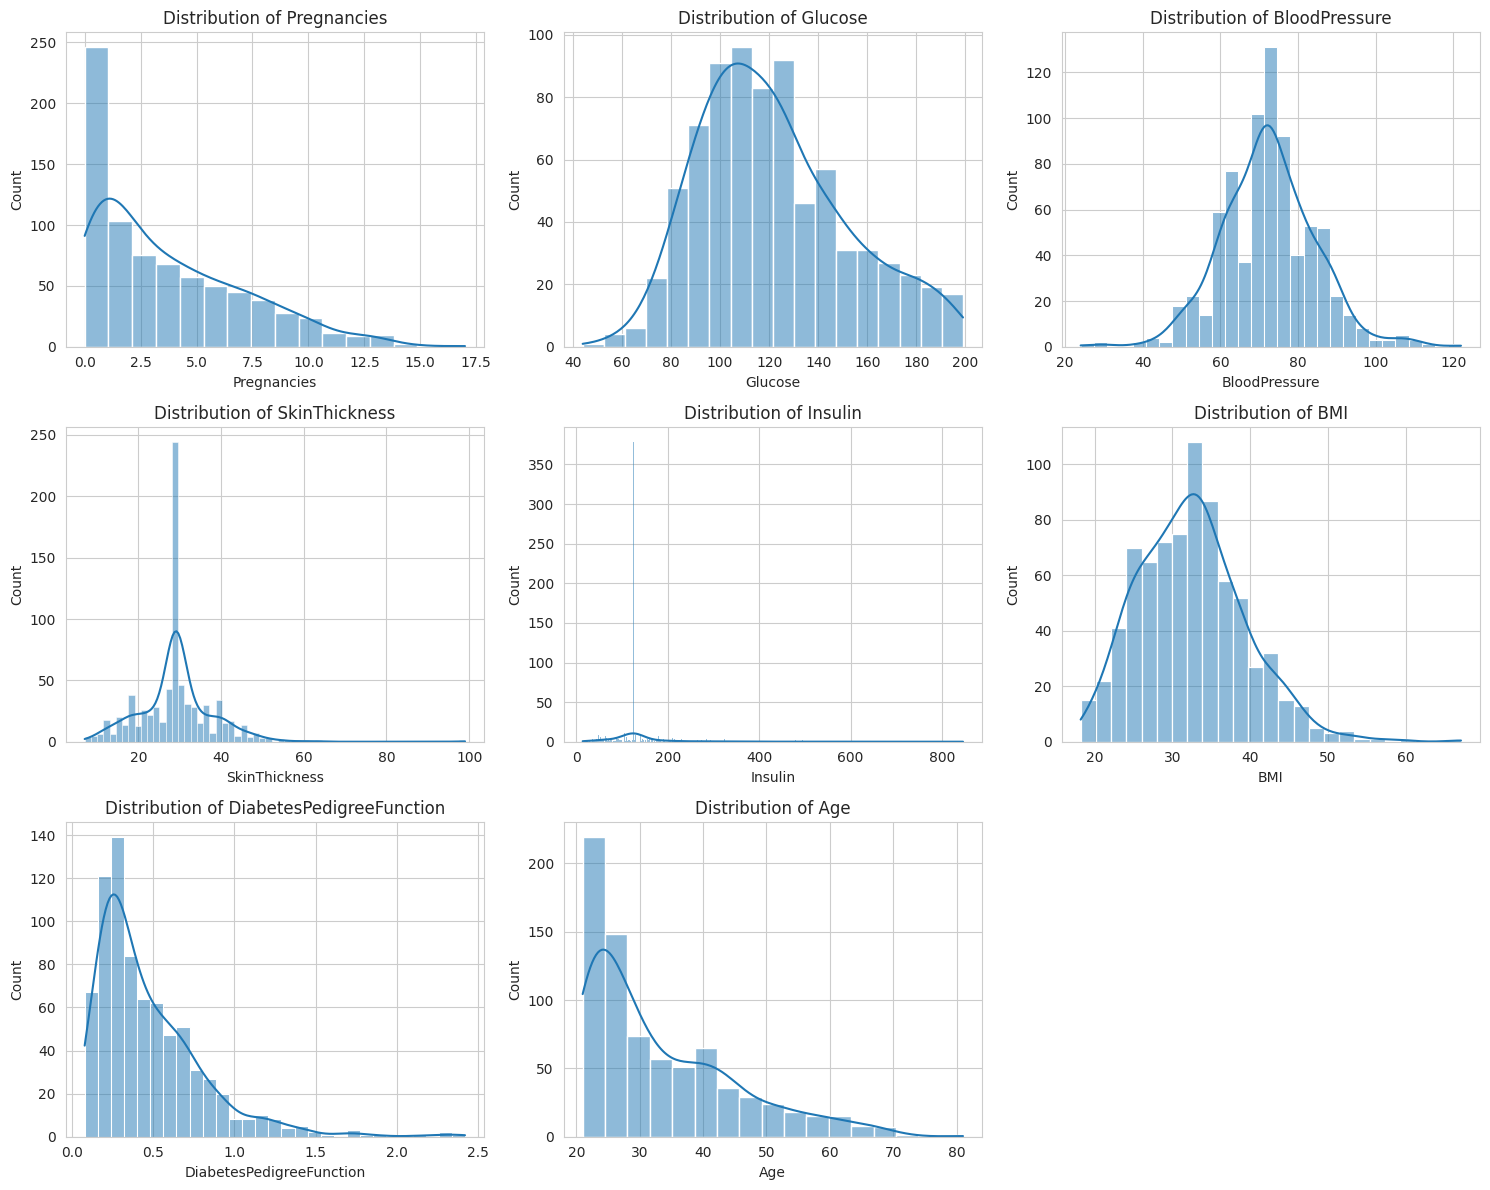


2. Checking for Outliers (Are there any extreme, suspicious data points?):


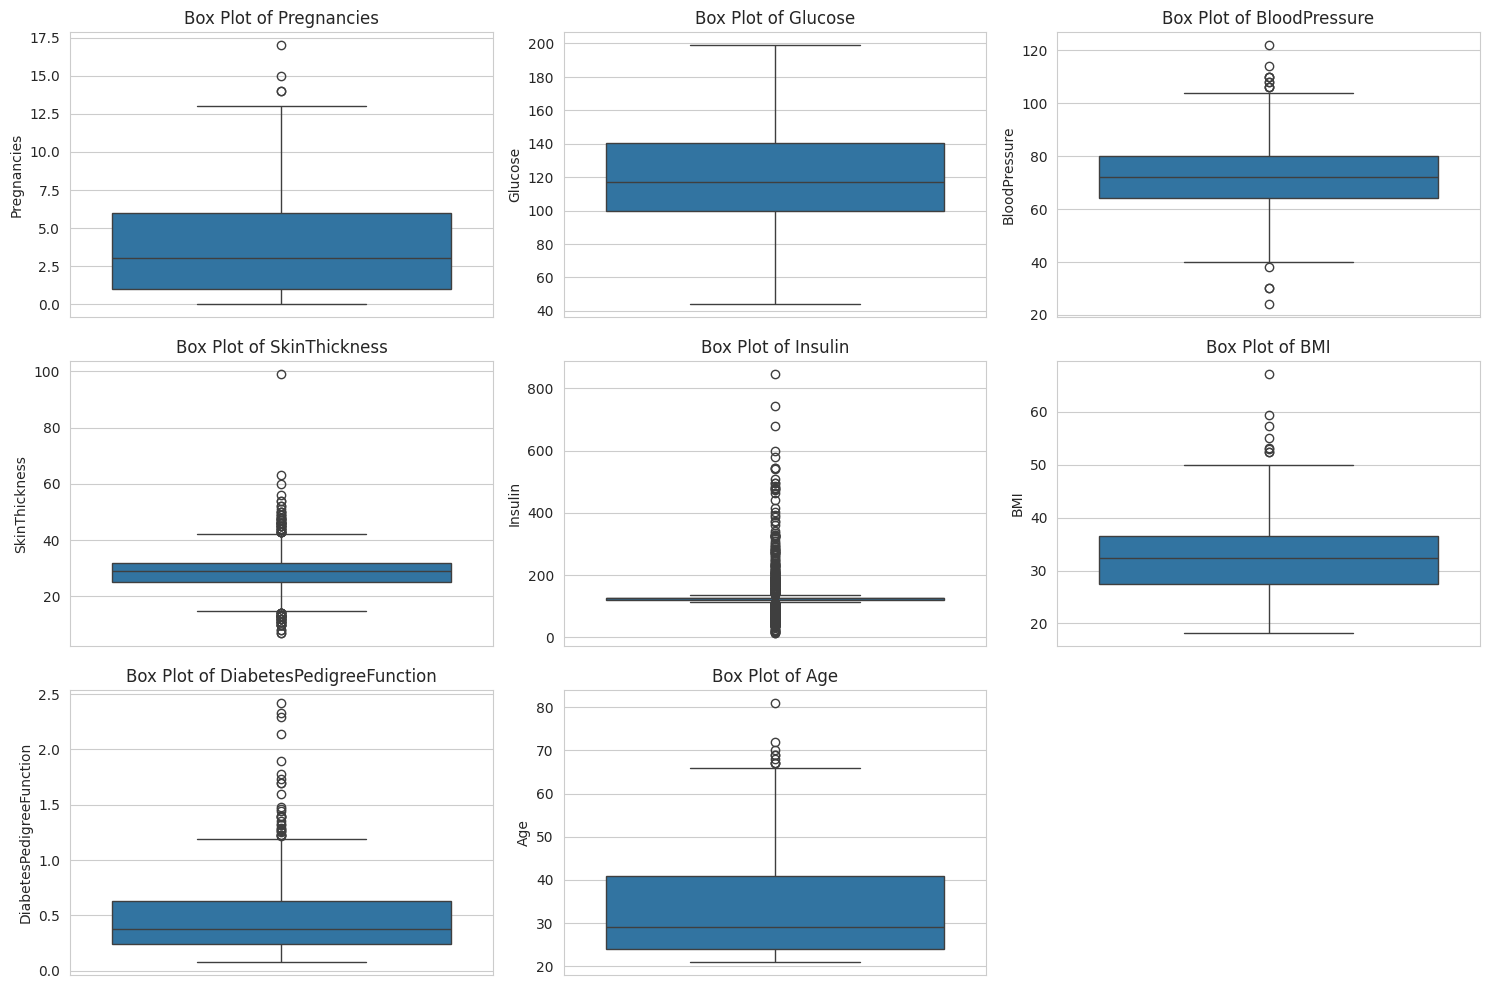


3. Feature vs. Target (Outcome) Relationship: (Do diabetics tend to have higher/lower values?):


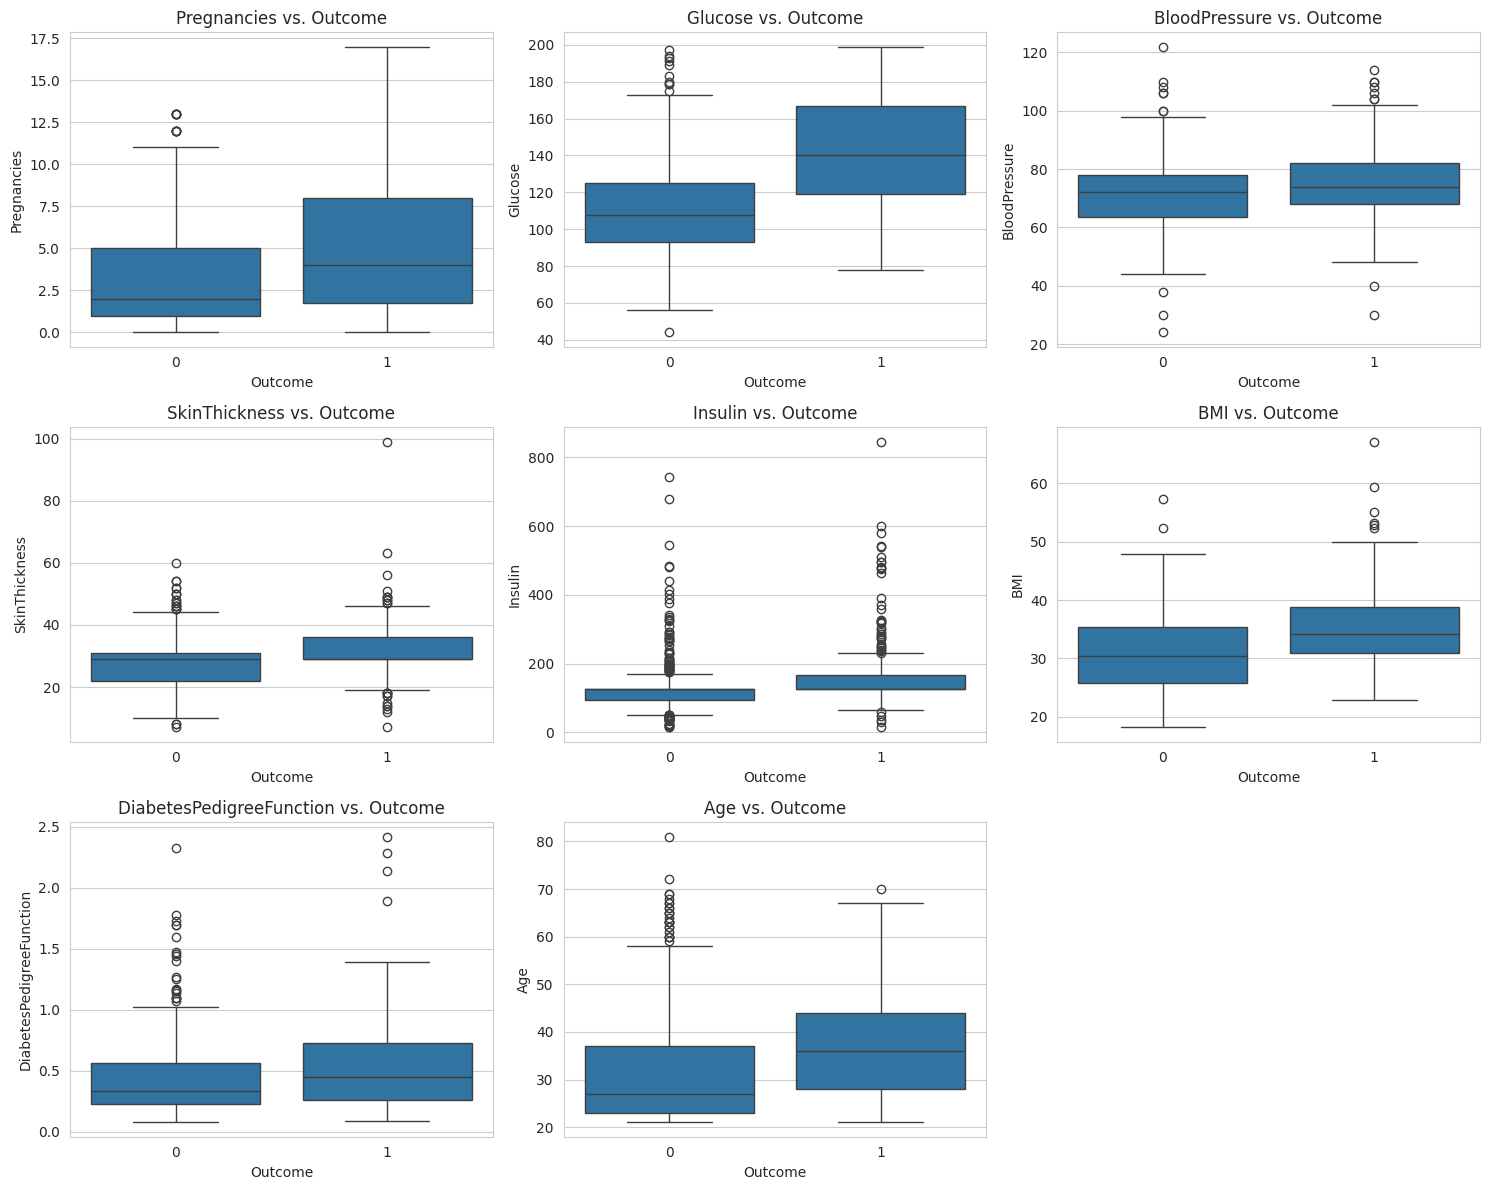


4. Correlation Heatmap (Are any input features highly related to each other?):


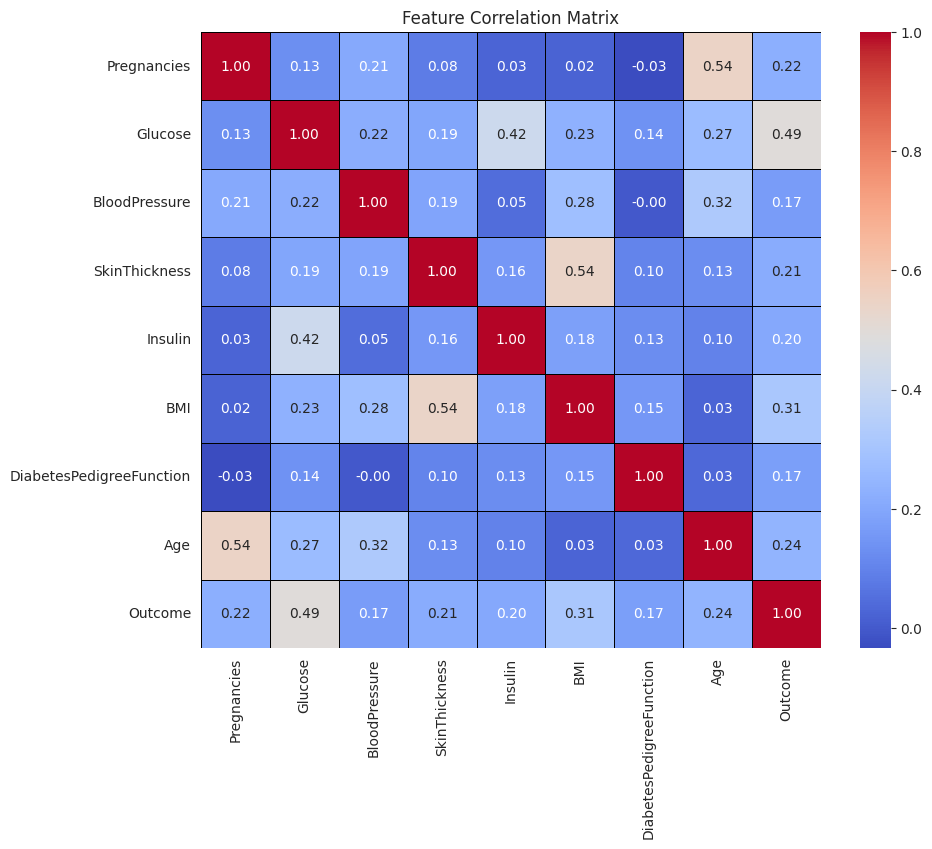


EDA Visualization Complete! We have the insights needed to proceed to Task 3: Model Benchmarking.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up our visual style
sns.set_style("whitegrid")

# df_diabetes is the DataFrame after replacing 0s with NaN
zero_impute_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_diabetes[zero_impute_cols] = df_diabetes[zero_impute_cols].replace(0, np.nan)

# Imputing NaNs with the median for visualization stability
for col in zero_impute_cols:
    df_diabetes[col].fillna(df_diabetes[col].median(), inplace=True)

# Defining all features for plotting
all_features = df_diabetes.columns.tolist()
all_features.remove('Outcome') # Exclude the target variable for now

print("--- Starting Project 2 Data Visualization ---")

# --- 1. Univariate Distributions (Checking Skewness) ---
print("\n1. Visualizing Feature Distributions (Are they normal? Are they skewed?):")
plt.figure(figsize=(15, 12))
for i, col in enumerate(all_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_diabetes[col], kde=True) # KDE helps visualize the smoothness of the curve
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# --- 2. Outlier Check (Using Box Plots) ---
print("\n2. Checking for Outliers (Are there any extreme, suspicious data points?):")
plt.figure(figsize=(15, 10))
for i, col in enumerate(all_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_diabetes[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# --- 3. Bivariate Analysis (Feature vs. Target) ---
print("\n3. Feature vs. Target (Outcome) Relationship: (Do diabetics tend to have higher/lower values?):")
plt.figure(figsize=(15, 12))
for i, col in enumerate(all_features):
    plt.subplot(3, 3, i + 1)
    # Box plot shows how the median and spread of a feature differ between the two outcome groups (0 vs 1)
    sns.boxplot(x='Outcome', y=col, data=df_diabetes)
    plt.title(f'{col} vs. Outcome')
plt.tight_layout()
plt.show()

# --- 4. Correlation Analysis ---
print("\n4. Correlation Heatmap (Are any input features highly related to each other?):")
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix
corr_matrix = df_diabetes.corr()
# Visualize the matrix to easily spot strong positive/negative correlations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black')
plt.title('Feature Correlation Matrix')
plt.show()

print("\nEDA Visualization Complete! We have the insights needed to proceed to Task 3: Model Benchmarking.")

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# A place to easily log all our results for later comparison
results = {}

# Defining the models we want to test. We start simple and move to complex.
models = {
    # LR is our crucial, highly interpretable baseline—the starting point for comparison.
    'Logistic Regression (Baseline)': LogisticRegression(random_state=42, solver='liblinear'),
    # Random Forest is a great general-purpose model for solid, non-linear performance.
    'Random Forest': RandomForestClassifier(random_state=42),
    # XGBoost is often the benchmark winner, especially with clean, structured data.
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

print("--- Starting Diabetes Model Benchmarking ---")

# Let's loop through every model, train it, and score it on the test set.
for name, model in models.items():
    start_time = time.time()

    # 1. Teach the model the patterns using the training data
    model.fit(X_train, y_train)

    # 2. Make our final class predictions on the held-out test data
    y_pred = model.predict(X_test)
    # We need the probabilities for the AUC-ROC score (the most robust metric)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 3. Calculate all the key performance indicators
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred), # Essential for handling imbalanced data!
        'AUC-ROC': roc_auc_score(y_test, y_proba),
        'Time (s)': time.time() - start_time
    }

    results[name] = metrics

    print(f"\n{name} Training Complete.")

# Convert the results into a clean table for comparison
results_df = pd.DataFrame(results).T

print("\n--- Diabetes Model Performance Summary ---")
# Sort the results by AUC-ROC to clearly see the best discriminator
print(results_df.sort_values(by='AUC-ROC', ascending=False).round(4))

# Identify the winner before proceeding to the expensive tuning step
best_model_name = results_df['AUC-ROC'].idxmax()
print(f"\nConclusion: {best_model_name} showed the strongest initial performance (highest AUC-ROC). We will now proceed with hyperparameter tuning for this model.")

--- Starting Diabetes Model Benchmarking ---

Logistic Regression (Baseline) Training Complete.

Random Forest Training Complete.

XGBoost Training Complete.

--- Diabetes Model Performance Summary ---
                                Accuracy  Precision  Recall  F1-Score  \
Random Forest                     0.7792     0.7273  0.5926    0.6531   
Logistic Regression (Baseline)    0.6948     0.5745  0.5000    0.5347   
XGBoost                           0.7597     0.6735  0.6111    0.6408   

                                AUC-ROC  Time (s)  
Random Forest                    0.8191    0.1738  
Logistic Regression (Baseline)   0.8128    0.0179  
XGBoost                          0.8081    0.1094  

Conclusion: Random Forest showed the strongest initial performance (highest AUC-ROC). We will now proceed with hyperparameter tuning for this model.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:00:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# --- 1. Define Scorer and Model ---
# We prioritize F1-Score for the best balance between Precision and Recall
f1_scorer = make_scorer(f1_score)
rf_model = RandomForestClassifier(random_state=42)

# --- 2. Define the Parameter Grid ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("\n--- Starting Hyperparameter Tuning (Random Forest for F1-Score) ---")
start_time = time.time()

# --- 3. Initialize and Run GridSearchCV ---
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring=f1_scorer,  # Optimize ONLY for F1-Score (The ideal compromise)
    cv=5,
    n_jobs=-1
)

# Fit the search on the training data
grid_search.fit(X_train, y_train)
end_time = time.time()

print(f"Tuning complete in {end_time - start_time:.2f} seconds.")

# --- 4. Report Best Results ---
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters Found (Optimized for F1-Score):")
print(best_params)
print(f"\nBest Cross-Validation F1-Score: {best_score:.4f}")

# --- 5. Final Evaluation on Unseen Test Set ---
final_tuned_model = grid_search.best_estimator_
y_pred_tuned = final_tuned_model.predict(X_test)
y_proba_tuned = final_tuned_model.predict_proba(X_test)[:, 1]

# Calculate all final metrics for a complete report
final_metrics_tuned = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall (Sensitivity)': recall_score(y_test, y_pred_tuned),
    'F1-Score': f1_score(y_test, y_pred_tuned),
    'AUC-ROC': roc_auc_score(y_test, y_proba_tuned)
}

print("\nFinal, Optimized Performance on UNSEEN Test Set (All Metrics):")
print(pd.DataFrame(final_metrics_tuned, index=['Optimized RF']).T.round(4))


--- Starting Hyperparameter Tuning (Random Forest for F1-Score) ---
Tuning complete in 114.51 seconds.

Best Hyperparameters Found (Optimized for F1-Score):
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Best Cross-Validation F1-Score: 0.6493

Final, Optimized Performance on UNSEEN Test Set (All Metrics):
                      Optimized RF
Accuracy                    0.7597
Precision                   0.6735
Recall (Sensitivity)        0.6111
F1-Score                    0.6408
AUC-ROC                     0.8146



--- FINAL PERFORMANCE: Optimized Random Forest ---
                      Optimized RF
Accuracy                    0.7597
Precision                   0.6735
Recall (Sensitivity)        0.6111
F1-Score                    0.6408
AUC-ROC                     0.8146
--------------------------------------------------

--- FEATURE IMPORTANCE: Clinical Factors ---
Top 10 Predictors of Diabetes Risk:
                          Importance
Feature                             
Glucose                       0.2964
BMI                           0.1651
Age                           0.1239
DiabetesPedigreeFunction      0.1151
Insulin                       0.0869
BloodPressure                 0.0755
Pregnancies                   0.0742
SkinThickness                 0.0630
--------------------------------------------------


/tmp/ipython-input-3478384201.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


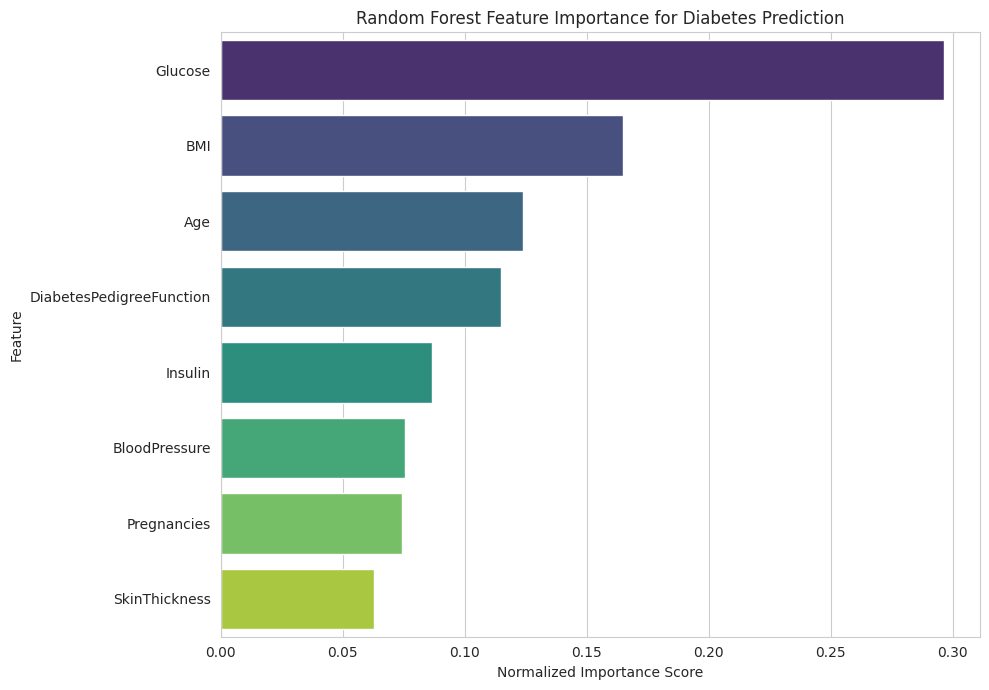

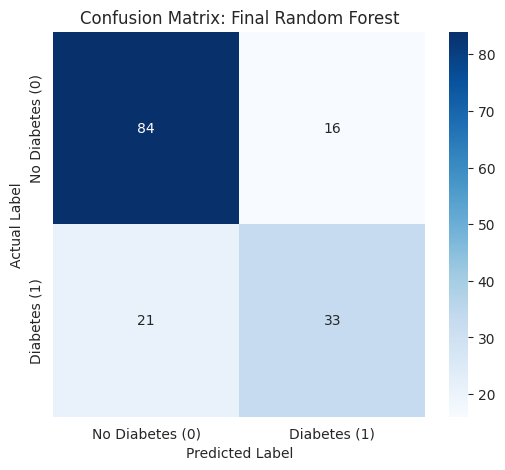


Confusion Matrix Interpretation:
True Positives (TP): 33 (Correctly detected cases)
False Negatives (FN): 21 (Missed diagnoses - Critical Risk)
False Positives (FP): 16 (False alarms)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- 1. SETUP: ASSUME FINAL OPTIMIZED MODEL IS AVAILABLE ---
# We assume the best F1-Score model instance and its predictions are ready to go!

# --- 2. FINAL METRICS CALCULATION ---

# Predict class labels and probabilities on the unseen test set
y_pred_tuned = final_tuned_model.predict(X_test)
y_proba_tuned = final_tuned_model.predict_proba(X_test)[:, 1]

# Calculate all the final metrics we need for the official report
final_metrics_tuned = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall (Sensitivity)': recall_score(y_test, y_pred_tuned), # How many true cases did we actually catch? (Safety first!)
    'F1-Score': f1_score(y_test, y_pred_tuned), # The ultimate score for balance
    'AUC-ROC': roc_auc_score(y_test, y_proba_tuned) # The gold standard for overall discrimination
}

print("\n--- FINAL PERFORMANCE: Optimized Random Forest ---")
# Print the results in a clean table format
print(pd.DataFrame(final_metrics_tuned, index=['Optimized RF']).T.round(4))
print("-" * 50)

# --- 3. FEATURE IMPORTANCE EXTRACTION AND VISUALIZATION ---

print("\n--- FEATURE IMPORTANCE: Clinical Factors ---")

# 1. Grab the feature importance scores directly from the Random Forest model
importances = final_tuned_model.feature_importances_
feature_names = X_train.columns # Get the names from the data we trained on

# 2. Create a clean DataFrame to view and sort the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 3. Sort by importance score (Highest score means highest impact on prediction)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 factors that drive the diabetes prediction
print("Top 10 Predictors of Diabetes Risk:")
print(feature_importance_df.head(10).round(4).set_index('Feature'))
print("-" * 50)

# 4. Visualize Feature Importance
plt.figure(figsize=(10, 7))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(8),
    palette='viridis' # A nice color map for the chart
)
plt.title('Random Forest Feature Importance for Diabetes Prediction')
plt.xlabel('Normalized Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- 5. CONFUSION MATRIX VISUALIZATION ---

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6, 5))
# Plotting the matrix to visualize hits (TP, TN) and misses (FP, FN)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes (0)', 'Diabetes (1)'],
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix: Final Random Forest')
plt.show()

# Interpretation:
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix Interpretation:")
print(f"True Positives (TP): {tp} (We correctly caught this many)")
print(f"False Negatives (FN): {fn} (Missed diagnoses - This is the number we must report as high risk)")
print(f"False Positives (FP): {fp} (False alarms)")